In [27]:
import pandas as pd
import json
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean, cosine
import seaborn as sns
import matplotlib.pyplot as plt


In [121]:
#load audio analysis data
audio_analysis_1 = pd.read_csv('./data/aud_analys_data_VivaMex.csv')
audio_analysis_2 = pd.read_csv('./data/aud_analys_data_MustBePlace.csv')
track_info = pd.read_csv('./data/AudioFeats.csv')
audio_analysis = pd.concat([audio_analysis_1,audio_analysis_2], axis=0).reset_index(drop=True)

track_info['key_scaled'] = (track_info['key']-track_info['key'].min()) / (track_info['key'].max()-track_info['key'].min())
track_info['tempo_scaled'] = (track_info.tempo - track_info.tempo.min()) / (track_info.tempo.max() - track_info.tempo.min())
# track_names = 
#get timbre time series
def str_list_to_array(str_list):
    return np.array([json.loads(v) for v in str_list])


In [147]:
audio_analysis[audio_analysis.track_id=='4kMiekbEHmPfwvGpAWsery'].pitches.values

array(['[0.128, 0.338, 0.163, 0.659, 0.249, 0.225, 0.076, 0.15, 0.114, 0.227, 1.0, 0.215]',
       '[0.202, 0.753, 0.22, 0.756, 0.313, 0.256, 0.124, 0.249, 0.198, 0.212, 1.0, 0.566]',
       '[0.321, 0.242, 0.06, 0.295, 0.177, 0.118, 0.308, 0.112, 0.073, 0.106, 0.251, 1.0]',
       ...,
       '[0.143, 0.075, 0.041, 0.033, 0.053, 0.048, 0.044, 0.115, 0.214, 1.0, 0.957, 0.196]',
       '[0.306, 0.198, 0.165, 0.116, 0.093, 0.071, 0.063, 0.214, 0.272, 1.0, 0.89, 0.214]',
       '[0.29, 0.296, 0.253, 0.19, 0.201, 0.198, 0.249, 0.296, 0.57, 0.608, 1.0, 0.414]'],
      dtype=object)

In [150]:
timbre_vals=[]
pitch_vals=[]
scale_timbre=True
for track_id in track_info.track_id.tolist():
    track_audio_analysis = audio_analysis[audio_analysis.track_id==track_id]
    timbre = track_audio_analysis.timbre.values.tolist()
    timbre = str_list_to_array(timbre)
    timbre = np.median(timbre, axis=0)
    timbre_vals += [timbre]

    pitch = track_audio_analysis.pitches.values.tolist()
    pitch = str_list_to_array(pitch)
    pitch = np.median(pitch, axis=0)
    pitch_vals += [pitch]
timbre_vals = np.array(timbre_vals)
pitch_vals = np.array(pitch_vals)
if scale_timbre:
    timbre_vals = (timbre_df.values - timbre_df.values.min(0)) / (timbre_df.values.max(0) - timbre_df.values.min(0))
timbre_df = pd.DataFrame(data=timbre_vals, columns=['timbre_%d'%i for i in range(timbre_vals.shape[1])])
pitch_df = pd.DataFrame(data=pitch_vals, columns=['pitch_%d'%i for i in range(pitch_vals.shape[1])])
feature_df = pd.concat([timbre_df, pitch_df], axis=1)
feature_df.head()

,timbre_0,timbre_1,timbre_2,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,...,pitch_2,pitch_3,pitch_4,pitch_5,pitch_6,pitch_7,pitch_8,pitch_9,pitch_10,pitch_11
0,0.396459,0.542597,0.441565,0.519247,0.327210,0.670350,0.523464,0.594491,0.497764,0.046486,...,0.205,0.366,0.2600,0.2730,0.154,0.145,0.074,0.087,0.332,0.372
1,0.422087,0.660995,0.464760,0.621353,0.373786,0.368390,0.000000,0.640094,0.873262,0.579353,...,0.281,0.113,0.0910,0.0570,0.086,0.110,0.059,0.099,0.073,0.236
2,0.464712,0.469105,0.512440,0.694334,0.378623,0.274155,0.550998,0.808701,0.400134,0.718180,...,0.126,0.261,0.4905,0.2125,0.173,0.188,0.228,0.118,0.177,0.348
3,0.539274,0.615929,0.522147,0.609649,0.409323,0.443983,0.428558,0.629998,0.387494,0.499843,...,0.354,0.287,0.4610,0.2430,0.235,0.265,0.328,0.171,0.157,0.623
4,0.563386,0.806544,0.455111,0.545575,0.325189,0.377464,0.318232,1.000000,0.681248,0.113503,...,0.276,0.682,0.4160,0.1890,0.205,0.198,0.108,0.109,0.301,0.171


In [151]:
track_info.head()

,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
0,VivaMéxico,Cane Robbers (Dan Solo Remix),4kMiekbEHmPfwvGpAWsery,358639,4,113.020,0.572,0.0947,0.892,0.001210,0.0441,0,-8.291,5,0.552,0.921,0.861817,0.454545,0.420566
1,VivaMéxico,Metropolis,4dUaNgt7yz800njfPPBCKG,431798,4,121.008,0.351,0.0803,0.921,0.004850,0.0491,1,-9.603,7,0.684,0.807,0.839950,0.636364,0.511328
2,VivaMéxico,Клуб,6pPDsvcENKpodvKJVEk8bu,357557,4,120.995,0.811,0.0621,0.875,0.003300,0.1060,1,-8.149,9,0.680,0.799,0.864183,0.818182,0.511181
3,VivaMéxico,Time - K-Effect Remix,1NpEwuKvVGfTbFFv15OPi7,314286,4,104.995,0.522,0.1170,0.856,0.031400,0.0669,0,-7.092,11,0.921,0.749,0.881800,1.000000,0.329383
4,VivaMéxico,Ultradisco,4XUuneNvpC17ShYbx17siV,461250,4,125.000,0.936,0.0563,0.938,0.000004,0.0563,1,-8.320,8,0.910,0.796,0.861333,0.727273,0.556687


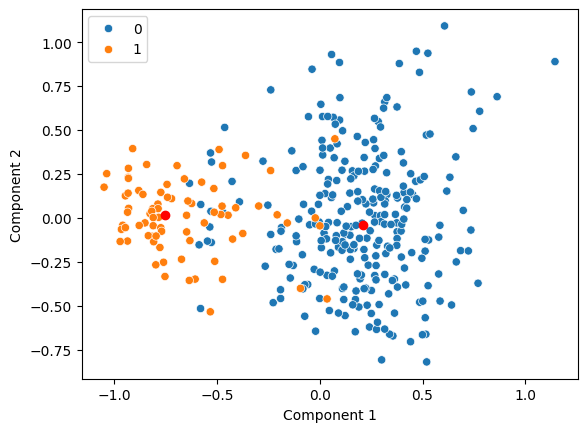

In [223]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale, normalize
feature_cols = ['tempo_scaled', 'valence', 'liveness', 'instrumentalness', 'acousticness',
       'speechiness',  'energy', 'danceability', 'loudness_scaled']


pca = PCA(n_components=2)

# X = feature_df.values
X = pd.concat([track_info[feature_cols], feature_df], axis=1).values
Y = track_info['playlist'].map({"VivaMéxico": 0, "This Must Be the Place": 1}).values
pca_arr = pca.fit_transform(X)
pc_df = pd.DataFrame(pca_arr, columns=["Component 1", "Component 2"])


hue_labels = Y

grp1_center = pc_df[Y==0].median()
grp2_center = pc_df[Y==1].median()
sns.scatterplot(x=pc_df.iloc[:, 0], y=pc_df.iloc[:, 1], hue=hue_labels)
plt.scatter(grp1_center[0], grp1_center[1], c='red')
plt.scatter(grp2_center[0], grp2_center[1], c='red')

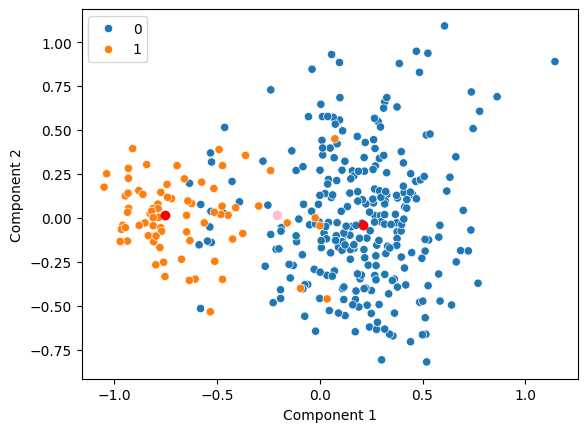

In [230]:
plt_track = pc_df[track_info.track_id=='1jDit1o3MxkQxFDVNdYX9v'].median()


grp1_center = pc_df[Y==0].median()
grp2_center = pc_df[Y==1].median()
sns.scatterplot(x=pc_df.iloc[:, 0], y=pc_df.iloc[:, 1], hue=hue_labels)
plt.scatter(grp1_center[0], grp1_center[1], c='red')
plt.scatter(grp2_center[0], grp2_center[1], c='red')
plt.scatter(plt_track[0], plt_track[1], c='pink')

In [206]:
inspect_ix = np.argsort(((pc_df[Y==0]-grp2_center).values**2).sum(1))[::-1][:5]
track_info.iloc[inspect_ix,:]
# df.iloc[inspect_ix,:]


,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
161,VivaMéxico,Inocência - Dominik Marz Remix,0VPuLtd3FxQjuuO4kdTE6u,331798,4,122.003,0.0307,0.115,0.957,0.000078,0.0376,1,-8.201,0,0.946,0.813,0.863317,0.000000,0.522634
16,VivaMéxico,Interpol,2EwRppyziQROuR9Bhphjbf,472000,4,120.009,0.0605,0.106,0.866,0.173000,0.0541,0,-9.139,6,0.783,0.797,0.847683,0.545455,0.499977
138,VivaMéxico,Zion - W.O.L.F. Remix,3opxBtaNDGyUgaIJB6ohFj,332797,4,118.004,0.1790,0.180,0.875,0.000906,0.0453,1,-6.815,7,0.867,0.808,0.886417,0.636364,0.477196
148,VivaMéxico,I See You,7zKjxNQwcCu6Dwtz4LScBI,310500,4,106.011,0.0704,0.106,0.925,0.011700,0.0484,1,-5.853,0,0.721,0.773,0.902450,0.000000,0.340927
193,VivaMéxico,Ceniza & Miel,1PyZ8exMFcbheM1SpLI9OJ,356975,4,118.999,0.0358,0.104,0.776,0.001600,0.0359,1,-9.927,0,0.742,0.688,0.834550,0.000000,0.488501


In [231]:
X0 = pc_df[Y==0].values
X1 = pc_df[Y==1].values
dists = [] 
for x0 in X0:
    d = []
    for x1 in X1:
        d+=[((x0-x1)**2).sum()]
    dists+=[d]
dists = np.array(dists)        

In [241]:
sort_flat_ix = np.argsort(dists.flatten())[:10]
# sort_flat_ix = np.argsort(dists.flatten())[::-1][:10]
sort_2d_ix = [np.unravel_index(ix, dists.shape) for ix in sort_flat_ix]
print(sort_2d_ix)
sort_2d_ix = sum([[ix[0], ix[1]+268] for ix in sort_2d_ix], [])
print(sort_2d_ix)

[(237, 30), (209, 61), (128, 69), (199, 24), (208, 24), (209, 59), (83, 24), (260, 24), (85, 30), (199, 51)]
[237, 298, 209, 329, 128, 337, 199, 292, 208, 292, 209, 327, 83, 292, 260, 292, 85, 298, 199, 319]


In [242]:
track_info.iloc[sort_2d_ix, :]

,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
237,VivaMéxico,DUB,7KFssh3kbp9zfNHImBRSnK,405120,4,125.008,0.901,0.0872,0.7670,0.000101,0.0914,0,-4.973,9,0.752,0.806,0.917117,0.818182,0.556778
298,This Must Be the Place,Around The Sun (Summer Dance Mix),7HvQevIxvMKKQlCQXINiVa,236253,4,115.006,0.744,0.0865,0.8900,0.008530,0.0358,1,-7.228,7,0.662,0.764,0.879533,0.636364,0.443131
209,VivaMéxico,Never Do Without You,6IgvAwypfi2uLJtf7OIlys,314516,4,123.986,0.791,0.0403,0.0136,0.019300,0.0484,1,-12.787,10,0.885,0.743,0.786883,0.909091,0.545165
329,This Must Be the Place,Surveillance Camera,5m6zSVqGLbWuSqLhvrWgIP,233613,4,110.008,0.388,0.2700,0.0598,0.007420,0.0418,1,-5.050,11,0.903,0.670,0.915833,1.000000,0.386342
128,VivaMéxico,La Niña del Volcán (Polocorp Remix),0aw4Dcu2XxEuLtXaepPTEA,324556,4,107.000,0.542,0.0680,0.4430,0.687000,0.0346,0,-8.461,9,0.629,0.732,0.858983,0.818182,0.352165
337,This Must Be the Place,Harmonia's Dream,4Qzx5fRypU4q1wEaYwHpnr,386347,4,140.029,0.486,0.0564,0.2370,0.002780,0.0444,1,-5.073,2,0.872,0.520,0.915450,0.181818,0.727451
199,VivaMéxico,Vamos de Fiesta,0bPTx662puy6Iq4BeG53EL,382439,4,123.007,0.554,0.1170,0.7050,0.009160,0.0451,1,-8.842,8,0.635,0.750,0.852633,0.727273,0.534042
292,This Must Be the Place,Dance Yrself Clean,2cmRpmO04TLaKPzmAzySYZ,536471,4,98.004,0.794,0.0400,0.7250,0.005570,0.0622,1,-9.829,11,0.611,0.739,0.836183,1.000000,0.249949
208,VivaMéxico,High Energy,4teQ7B3PMQUcJ1R8q4gcbv,344723,4,128.987,0.341,0.0888,0.9410,0.001690,0.0384,1,-6.400,9,0.888,0.689,0.893333,0.818182,0.601988
292,This Must Be the Place,Dance Yrself Clean,2cmRpmO04TLaKPzmAzySYZ,536471,4,98.004,0.794,0.0400,0.7250,0.005570,0.0622,1,-9.829,11,0.611,0.739,0.836183,1.000000,0.249949


In [245]:
track_info[track_info.playlist=='This Must Be the Place'].sort_values('valence')

,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
331,This Must Be the Place,Oh The Sunn!,1Qth3TmxzsBYDpCRCffdZk,138213,4,111.221,0.124,0.4400,0.025200,0.054000,0.0322,0,-6.107,4,0.644,0.708,0.898217,0.363636,0.400125
317,This Must Be the Place,Fools Gold - Remastered,2mv6GY70UsHiTCGQZ4JfgC,594453,4,112.780,0.164,0.2890,0.858000,0.000367,0.0457,1,-6.393,7,0.875,0.731,0.893450,0.636364,0.417839
285,This Must Be the Place,Sequence,3bV9Oboi0viDEV5S39z22l,199057,4,109.999,0.175,0.1250,0.806000,0.000661,0.0317,0,-7.276,0,0.777,0.482,0.878733,0.000000,0.386240
277,This Must Be the Place,Sprawl II (Mountains Beyond Mountains),0epAG0WWRlDMsMFJiE5c6I,325707,4,99.966,0.185,0.1150,0.001210,0.015900,0.0282,1,-6.432,8,0.809,0.521,0.892800,0.727273,0.272242
311,This Must Be the Place,Under The Pressure,5j58jhAFzAy0keSuQYsQBn,532307,4,134.385,0.195,0.1320,0.173000,0.309000,0.0297,1,-6.545,6,0.710,0.324,0.890917,0.545455,0.663322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,This Must Be the Place,Tenderness,5S6spUAa7hNeJCP48786fm,186107,4,97.958,0.951,0.0774,0.000216,0.167000,0.0364,1,-4.269,7,0.720,0.717,0.928850,0.636364,0.249426
332,This Must Be the Place,On And On,2NwwdNPSlvoRBqomWa4S2N,241707,4,130.058,0.960,0.4550,0.537000,0.135000,0.0308,1,-4.973,0,0.835,0.698,0.917117,0.000000,0.614157
333,This Must Be the Place,Pretty Boys (feat. Khruangbin),3grdgfHCm4mWVJliAitsE6,348859,4,101.021,0.962,0.1160,0.768000,0.002440,0.0445,0,-5.338,11,0.979,0.696,0.911033,1.000000,0.284229
325,This Must Be the Place,Then It All Goes Away,7MzjD4Ayl07w0TRsYSqfCh,183440,4,140.019,0.964,0.0807,0.000023,0.018400,0.0332,1,-3.061,2,0.817,0.683,0.948983,0.181818,0.727338


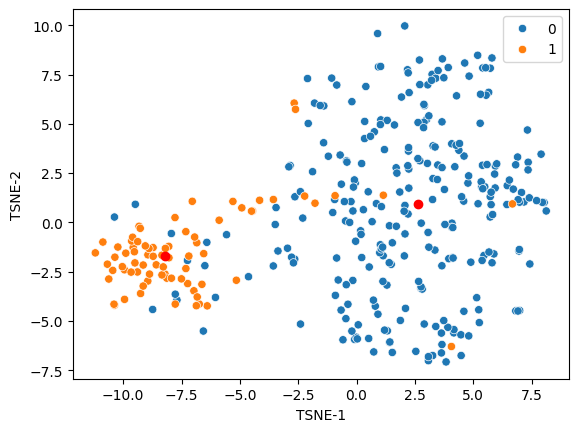

In [219]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
# mol = Chem.MolFromSmiles(smiles)
tsne_df = pd.DataFrame(tsne_results, columns=["TSNE-1", "TSNE-2"])

grp1_center = tsne_df[Y==0].median()
grp2_center = tsne_df[Y==1].median()
sns.scatterplot(x=tsne_df.iloc[:, 0], y=tsne_df.iloc[:, 1], hue=hue_labels)
plt.scatter(grp1_center[0], grp1_center[1], c='red')
plt.scatter(grp2_center[0], grp2_center[1], c='red')

In [222]:
inspect_ix = np.argsort(((tsne_df[Y==1]-grp1_center).values**2).sum(1))[:5]
track_info.iloc[268+inspect_ix,:]
# df.iloc[inspect_ix,:]


,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
298,This Must Be the Place,Around The Sun (Summer Dance Mix),7HvQevIxvMKKQlCQXINiVa,236253,4,115.006,0.744,0.0865,0.890,0.008530,0.0358,1,-7.228,7,0.662,0.764,0.879533,0.636364,0.443131
292,This Must Be the Place,Dance Yrself Clean,2cmRpmO04TLaKPzmAzySYZ,536471,4,98.004,0.794,0.0400,0.725,0.005570,0.0622,1,-9.829,11,0.611,0.739,0.836183,1.000000,0.249949
285,This Must Be the Place,Sequence,3bV9Oboi0viDEV5S39z22l,199057,4,109.999,0.175,0.1250,0.806,0.000661,0.0317,0,-7.276,0,0.777,0.482,0.878733,0.000000,0.386240
318,This Must Be the Place,Temptation,7j5Q3zhjvpQvMeoPSZwdsa,419240,4,124.977,0.936,0.2220,0.851,0.290000,0.0337,1,-9.478,0,0.881,0.600,0.842033,0.000000,0.556425
278,This Must Be the Place,Moon Rocks - 2005 Remaster,1jDit1o3MxkQxFDVNdYX9v,345573,4,123.654,0.947,0.4060,0.819,0.057200,0.0410,0,-9.019,11,0.656,0.867,0.849683,1.000000,0.541393


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

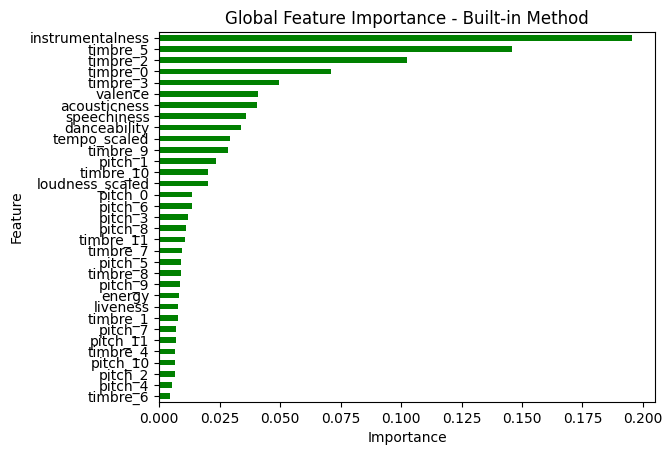

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=39)
X_in = pd.concat([track_info[feature_cols], feature_df], axis=1)
rf.fit(X_in, Y)

global_importances = pd.Series(rf.feature_importances_, index=X_in.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [26]:
# # Compute DTW distance
# distance, _ = fastdtw(timbre_vals1, timbre_vals2, dist=euclidean)  # Transpose the data to align dimensions

# print("DTW Distance:", distance)

DTW Distance: 473124.5009474669


In [248]:
track_info[track_info.track_id=='6aBUnkXuCEQQHAlTokv9or']

,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
268,This Must Be the Place,This Must Be the Place (Naive Melody) - 2005 R...,6aBUnkXuCEQQHAlTokv9or,296147,4,114.443,0.966,0.028,0.179,0.331,0.0333,1,-10.15,7,0.641,0.942,0.830833,0.636364,0.436734


In [256]:
track_info[track_info.playlist=='This Must Be the Place'].sort_values('valence', ascending=False).head(20)

,playlist,track_name,track_id,duration_ms,time_signature,tempo,valence,liveness,instrumentalness,acousticness,speechiness,mode,loudness,key,energy,danceability,loudness_scaled,key_scaled,tempo_scaled
268,This Must Be the Place,This Must Be the Place (Naive Melody) - 2005 R...,6aBUnkXuCEQQHAlTokv9or,296147,4,114.443,0.966,0.0280,0.179000,0.331000,0.0333,1,-10.150,7,0.641,0.942,0.830833,0.636364,0.436734
325,This Must Be the Place,Then It All Goes Away,7MzjD4Ayl07w0TRsYSqfCh,183440,4,140.019,0.964,0.0807,0.000023,0.018400,0.0332,1,-3.061,2,0.817,0.683,0.948983,0.181818,0.727338
333,This Must Be the Place,Pretty Boys (feat. Khruangbin),3grdgfHCm4mWVJliAitsE6,348859,4,101.021,0.962,0.1160,0.768000,0.002440,0.0445,0,-5.338,11,0.979,0.696,0.911033,1.000000,0.284229
332,This Must Be the Place,On And On,2NwwdNPSlvoRBqomWa4S2N,241707,4,130.058,0.960,0.4550,0.537000,0.135000,0.0308,1,-4.973,0,0.835,0.698,0.917117,0.000000,0.614157
284,This Must Be the Place,Tenderness,5S6spUAa7hNeJCP48786fm,186107,4,97.958,0.951,0.0774,0.000216,0.167000,0.0364,1,-4.269,7,0.720,0.717,0.928850,0.636364,0.249426
307,This Must Be the Place,All I Want,4Cy0NHJ8Gh0xMdwyM9RkQm,401440,4,134.990,0.949,0.1060,0.880000,0.053700,0.0361,1,-7.014,7,0.829,0.530,0.883100,0.636364,0.670197
320,This Must Be the Place,The Dreaming Moon,3aVBGDsM3G8QXAmS9O5nqG,204800,4,164.016,0.949,0.0642,0.770000,0.047800,0.0326,1,-10.885,9,0.851,0.501,0.818583,0.818182,1.000000
278,This Must Be the Place,Moon Rocks - 2005 Remaster,1jDit1o3MxkQxFDVNdYX9v,345573,4,123.654,0.947,0.4060,0.819000,0.057200,0.0410,0,-9.019,11,0.656,0.867,0.849683,1.000000,0.541393
339,This Must Be the Place,The Valley of The Pagans (feat. Beck),3oP3Tfn86FRmxAGsV0TqCp,181029,4,130.034,0.940,0.1170,0.000036,0.077800,0.0457,1,-5.802,2,0.856,0.750,0.903300,0.181818,0.613885
318,This Must Be the Place,Temptation,7j5Q3zhjvpQvMeoPSZwdsa,419240,4,124.977,0.936,0.2220,0.851000,0.290000,0.0337,1,-9.478,0,0.881,0.600,0.842033,0.000000,0.556425
